In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [62]:
df=pd.read_csv("EastWestAirlines - data.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [63]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [65]:
# Data Preprocessing
# No missing values to handle
# No outliers removal demonstrated for simplicity
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(['ID#'], axis=1))  # Scaling features except ID column

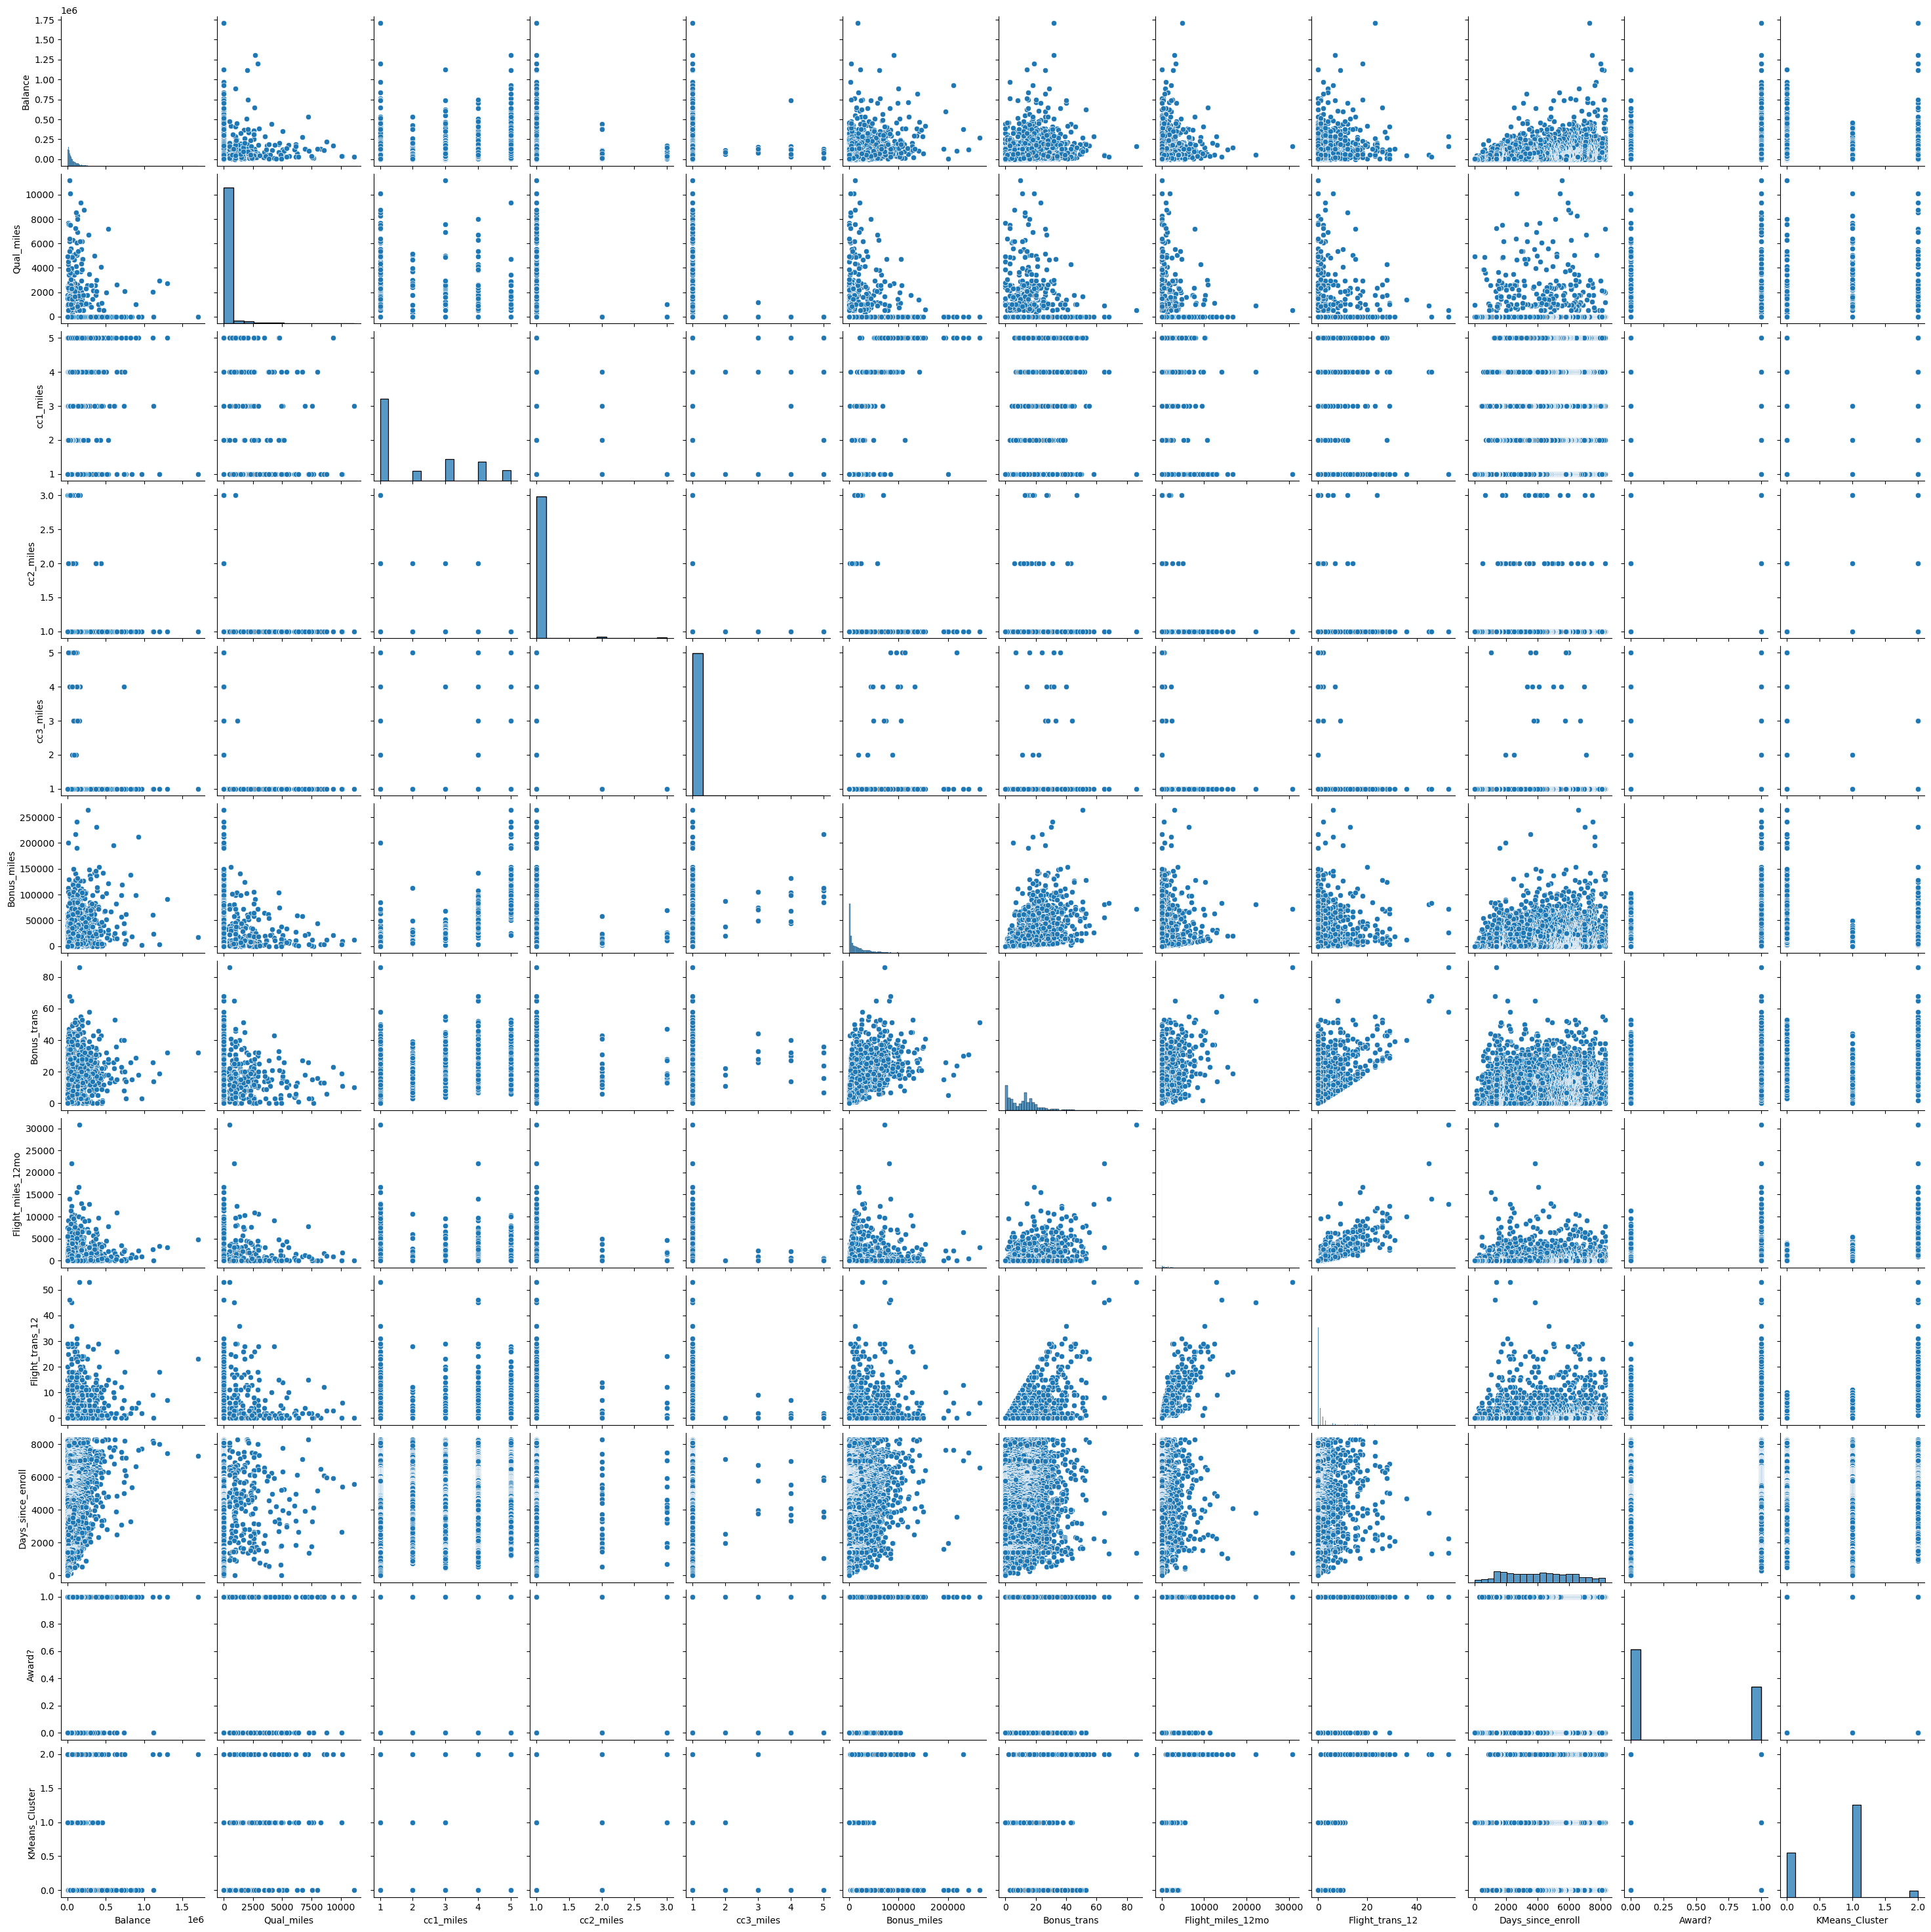

In [70]:
# Exploratory Data Analysis (EDA)
# Visualize feature distributions
sns.pairplot(df.drop('ID#', axis=1))
plt.show()

In [69]:
# Implementing Clustering Algorithms
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

In [71]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_features)


In [72]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

In [74]:
# Cluster Analysis and Interpretation

# K-Means Clustering Analysis
kmeans_analysis = df.groupby('KMeans_Cluster').mean()
print("K-Means Clustering Analysis:")
print(kmeans_analysis)

# Hierarchical Clustering Analysis
hierarchical_analysis = df.groupby('Hierarchical_Cluster').mean()
print("\nHierarchical Clustering Analysis:")
print(hierarchical_analysis)

# DBSCAN Clustering Analysis
dbscan_analysis = df.groupby('DBSCAN_Cluster').mean()
print("\nDBSCAN Clustering Analysis:")
print(dbscan_analysis)


K-Means Clustering Analysis:
                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               1600.939807  117635.571429  126.030498   3.744783   1.002408   
1               2233.072896   44429.433114   98.345483   1.237301   1.019000   
2               1743.660920  190656.775862  951.994253   2.178161   1.034483   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.036918  40624.182986    19.012039         333.447030   
1                1.000388   4854.212098     7.019775         198.970531   
2                1.011494  31181.005747    26.454023        5236.454023   

                Flight_trans_12  Days_since_enroll    Award?  \
KMeans_Cluster                                                 
0                      0.990369        4884.273676  0.649278   
1 

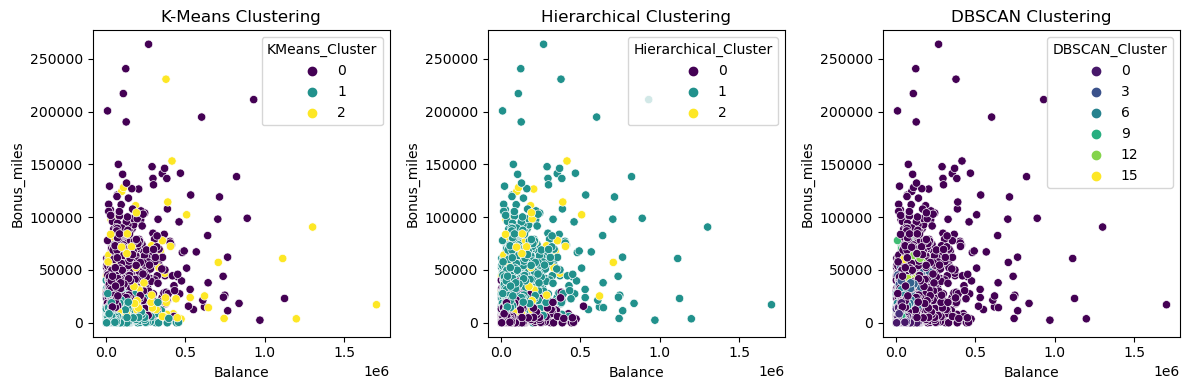

In [75]:
# Visualization
# Visualize clustering results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Balance', y='Bonus_miles', hue='KMeans_Cluster', palette='viridis')
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Balance', y='Bonus_miles', hue='Hierarchical_Cluster', palette='viridis')
plt.title('Hierarchical Clustering')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Balance', y='Bonus_miles', hue='DBSCAN_Cluster', palette='viridis')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

In [76]:
# Evaluation and Performance Metrics
# Silhouette Score
print("Silhouette Score (K-Means):", silhouette_score(scaled_features, df['KMeans_Cluster']))
print("Silhouette Score (DBSCAN):", silhouette_score(scaled_features, df['DBSCAN_Cluster']))

Silhouette Score (K-Means): 0.31110680893107867
Silhouette Score (DBSCAN): -0.07834757831741163
